In [1]:
pip install mtcnn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 70.5 MB/s eta 0:00:00


3/3 [==============================] - 0s 19ms/step
<class 'list'>
{'box': [27, 237, 70, 96], 'confidence': 0.9999997019767761, 'keypoints': {'left_eye': (47, 276), 'right_eye': (80, 274), 'nose': (67, 289), 'mouth_left': (49, 306), 'mouth_right': (82, 304)}}
{'box': [380, 340, 64, 91], 'confidence': 0.9999753832817078, 'keypoints': {'left_eye': (397, 376), 'right_eye': (428, 376), 'nose': (412, 393), 'mouth_left': (398, 407), 'mouth_right': (426, 407)}}
{'box': [461, 241, 76, 100], 'confidence': 0.9999716877937317, 'keypoints': {'left_eye': (487, 280), 'right_eye': (522, 278), 'nose': (510, 295), 'mouth_left': (489, 314), 'mouth_right': (521, 311)}}
{'box': [525, 366, 64, 82], 'confidence': 0.9999715685844421, 'keypoints': {'left_eye': (538, 400), 'right_eye': (568, 400), 'nose': (550, 417), 'mouth_left': (540, 428), 'mouth_right': (567, 427)}}
{'box': [194, 391, 66, 91], 'confidence': 0.9999640583992004, 'keypoints': {'left_eye': (212, 428), 'right_eye': (243, 426), 'nose': (231, 448

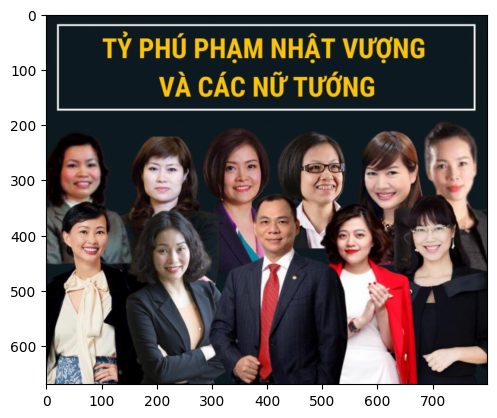

In [2]:
import matplotlib.pyplot as plt
from mtcnn import MTCNN

fileim = '/pham-thuy-hang-pho-chu-tich-hdqt-tap-doan-vingroup-538360.jpg'
img=plt.imread(fileim)
plt.imshow(img)
detector=MTCNN()
faces=detector.detect_faces(img)
print(type(faces))
for face in faces:
  print(face)



3/3 [==============================] - 0s 18ms/step


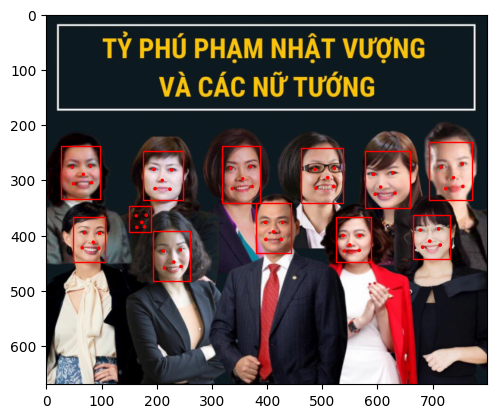

In [3]:
import matplotlib.pyplot as plt
from mtcnn import mtcnn
fileim='/pham-thuy-hang-pho-chu-tich-hdqt-tap-doan-vingroup-538360.jpg'
detector=MTCNN()
faces=detector.detect_faces(img)
plt.imshow(img)
ax=plt.gca()
for face in faces:
  x,y,width,height=face['box']
  rect=plt.Rectangle((x,y),width,height,fill=False,color='red')
  ax.add_patch(rect)
  for key,value in face['keypoints'].items():
    det=plt.Circle(value,radius=2,color='red')
    ax.add_patch(det)
plt.show()

3/3 [==============================] - 0s 30ms/step


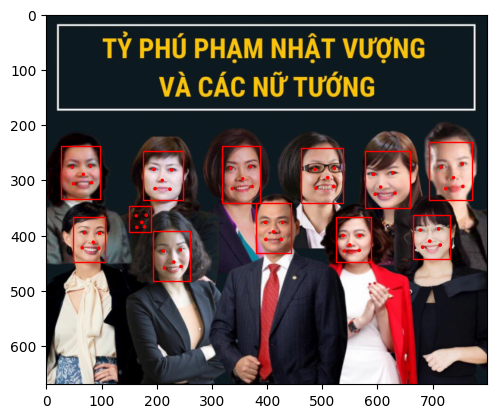

In [4]:
import matplotlib.pyplot as plt
from mtcnn import MTCNN
fileim='/pham-thuy-hang-pho-chu-tich-hdqt-tap-doan-vingroup-538360.jpg'
detector=MTCNN()
faces=detector.detect_faces(img)
plt.imshow(img)
ax=plt.gca()
for face in faces:
  x,y,width,height=face['box']
  rect=plt.Rectangle((x,y),width,height,fill=False,color='red')
  ax.add_patch(rect)
  for key,value in face['keypoints'].items():
    det=plt.Circle(value,radius=2,color='red')
    ax.add_patch(det)
plt.show()

3/3 [==============================] - 0s 19ms/step


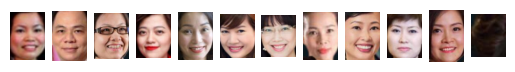

In [5]:
import matplotlib.pyplot as plt
from mtcnn import MTCNN
def draw_faces(filename,result_list):
  data=plt.imread(filename)
  for i in range (len(result_list)):
    x1,y1,width,height=result_list[i]['box']
    x2,y2= x1 +width,y1 +height
    plt.subplot(1,len(result_list),i+1)
    plt.axis('off')
    plt.imshow(data[y1:y2,x1:x2])
plt.show()
filename='/pham-thuy-hang-pho-chu-tich-hdqt-tap-doan-vingroup-538360.jpg'
img = plt.imread(filename)
detector =MTCNN()
faces = detector.detect_faces(img)
draw_faces(filename,faces)

35363/35363 [==============================] - 0s 0us/step
Predicted: [('n02093428', 'American_Staffordshire_terrier', 0.7157898), ('n02093256', 'Staffordshire_bullterrier', 0.22402482), ('n02108089', 'boxer', 0.033928785)]


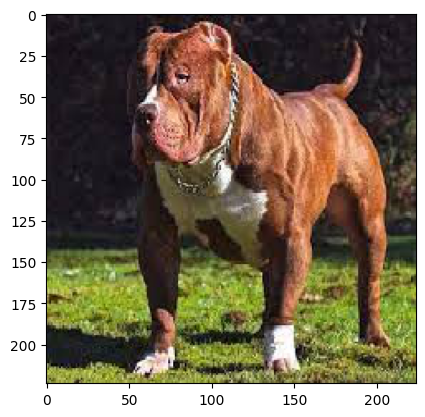

In [6]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = '/dog.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])
plt.imshow(img)
# Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]

1/1 [==============================] - 0s 485ms/step


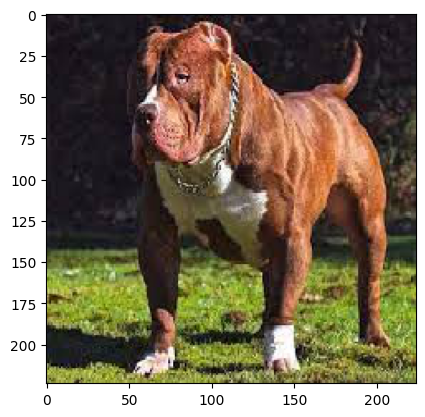

In [7]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False)

img_path = '/dog.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)
plt.imshow(img)

574710816/574710816 [==============================] - 3s 0us/step


1/1 [==============================] - 1s 521ms/step


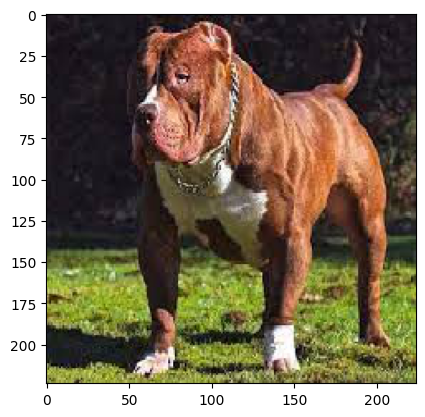

In [8]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

base_model = VGG19(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)

img_path = '/dog.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

block4_pool_features = model.predict(x)
plt.imshow(img)

In [9]:
pip install youtube_search

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
from youtube_search import YoutubeSearch
import webbrowser
mysong = input('Nhập tên bài hát')
result=YoutubeSearch(mysong,max_results=10).to_dict()
print(result)


print(result[0]['url_suffix'])
url = 'http://www.youtube.com'+ result[0]['url_suffix']
print(url)

webbrowser.open(url)
print('Bai hat yeu thich cua ban da duoc mo')





Nhập tên bài hátone more night
[{'id': 'fwK7ggA3-bU', 'thumbnails': ['https://i.ytimg.com/vi/fwK7ggA3-bU/hq720.jpg?sqp=-oaymwEjCOgCEMoBSFryq4qpAxUIARUAAAAAGAElAADIQj0AgKJDeAE=&rs=AOn4CLB80xtxfVvRoqPJ9xyiurYzOnqg6g', 'https://i.ytimg.com/vi/fwK7ggA3-bU/hq720.jpg?sqp=-oaymwEXCNAFEJQDSFryq4qpAwkIARUAAIhCGAE=&rs=AOn4CLBXVEO19pFct2IAM4mu9dpGgBBB_w'], 'title': 'Maroon 5 - One More Night (Official Music Video)', 'long_desc': None, 'channel': 'Maroon 5', 'duration': '3:43', 'views': '1,033,361,628 views', 'publish_time': '10 years ago', 'url_suffix': '/watch?v=fwK7ggA3-bU&pp=ygUOb25lIG1vcmUgbmlnaHQ%3D'}, {'id': 'zKVq-P3z5Vg', 'thumbnails': ['https://i.ytimg.com/vi/zKVq-P3z5Vg/hqdefault.jpg?sqp=-oaymwEjCOADEI4CSFryq4qpAxUIARUAAAAAGAElAADIQj0AgKJDeAE=&rs=AOn4CLC08sAgbj3CWh7r6hk_0D-X_u1Izw'], 'title': 'Phil Collins - One More Night (Official Music Video)', 'long_desc': None, 'channel': 'Phil Collins', 'duration': '5:20', 'views': '84,770,227 views', 'publish_time': '12 years ago', 'url_suffix': '

In [11]:
pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
from youtube_search import YoutubeSearch
import webbrowser
from openpyxl import Workbook
data=Workbook()
sheet=data.active
mysong=input('Xin mời bạn chọn tên bài hát')
print(mysong)
result=YoutubeSearch(mysong,max_results=10).to_dict()
print(result)
for i in range (10):
    print(result[i] ['title'])
    print(result[i] ['url_suffix'])
    url='https://www.youtube.com'+ result[i] ['url_suffix']
    print(url)
    sheet['A'+str(i+1)]=i+1
    sheet['B'+str(i+1)]=result[i]['title']
    sheet['C'+str(i+1)]=result[i]['url_suffix']
    sheet['D'+str(i+1)]=result[i]['views']
    #webbrowser.open(url)
data.save('UEH.xlsx')


Xin mời bạn chọn tên bài hátone more night
one more night
[{'id': 'fwK7ggA3-bU', 'thumbnails': ['https://i.ytimg.com/vi/fwK7ggA3-bU/hq720.jpg?sqp=-oaymwEjCOgCEMoBSFryq4qpAxUIARUAAAAAGAElAADIQj0AgKJDeAE=&rs=AOn4CLB80xtxfVvRoqPJ9xyiurYzOnqg6g', 'https://i.ytimg.com/vi/fwK7ggA3-bU/hq720.jpg?sqp=-oaymwEXCNAFEJQDSFryq4qpAwkIARUAAIhCGAE=&rs=AOn4CLBXVEO19pFct2IAM4mu9dpGgBBB_w'], 'title': 'Maroon 5 - One More Night (Official Music Video)', 'long_desc': None, 'channel': 'Maroon 5', 'duration': '3:43', 'views': '1,033,361,628 views', 'publish_time': '10 years ago', 'url_suffix': '/watch?v=fwK7ggA3-bU&pp=ygUOb25lIG1vcmUgbmlnaHQ%3D'}, {'id': 'zKVq-P3z5Vg', 'thumbnails': ['https://i.ytimg.com/vi/zKVq-P3z5Vg/hqdefault.jpg?sqp=-oaymwEjCOADEI4CSFryq4qpAxUIARUAAAAAGAElAADIQj0AgKJDeAE=&rs=AOn4CLC08sAgbj3CWh7r6hk_0D-X_u1Izw'], 'title': 'Phil Collins - One More Night (Official Music Video)', 'long_desc': None, 'channel': 'Phil Collins', 'duration': '5:20', 'views': '84,770,227 views', 'publish_time': '12 